In [17]:
from math import *
from pylab import *

import matplotlib.pyplot as plt
import numpy as np
import time

### 1. Calculations

In [18]:
BITS_PER_SAMPLE = 32        # bits
SAMPLE_RATE     = 125e6     # Hz

In [19]:
maxMemBytes = 16**5 * 2
maxNumMemSamples = maxMemBytes * 8 / BITS_PER_SAMPLE

print('Per channel:')
print('Max memory allocated  = {:>8} = 16^{:<2} bytes'.format(int(maxMemBytes), log2(maxMemBytes)/log2(16)))
print('Max number of samples = {:>8} =  2^{:<2}'.format(int(maxNumMemSamples), log2(maxNumMemSamples)))

Per channel:
Max memory allocated  =  2097152 = 16^5.25 bytes
Max number of samples =   524288 =  2^19.0


In [20]:
signalPeriod = maxNumMemSamples / SAMPLE_RATE
signalFrequency = 1 / signalPeriod

print('Singal period   = {:>10.5f} μs'.format(signalPeriod * 1e6))
print('Signal frequncy = {:>10.5f} Hz'.format(signalFrequency))

Singal period   = 4194.30400 μs
Signal frequncy =  238.41858 Hz


### 3. Data Analysis

In [21]:
## LOAD .npy DATA FILES

nSamples = maxNumMemSamples

units = 'RAW'
# units = 'VOLTS'

trig_src = 'CH1_PE'
# trig_src = 'CH2_PE'

filename = f'{int(signalFrequency)}Hz_{int(nSamples)}_{int(SAMPLE_RATE/1e6)}MHz_{trig_src}_{units.lower()}'

signal_num_a = np.load(f'{filename}_chA.npy', allow_pickle=True)
signal_num_b = np.load(f'{filename}_chB.npy', allow_pickle=True)

print(f'{filename} data loaded into Numpy arrays')

238Hz_524288_125MHz_CH1_PE_raw data loaded into Numpy arrays


In [22]:
# data properties
nSamples = len(signal_num_a)
tSamples = (nSamples / SAMPLE_RATE) * 1e6
totDecFactor = maxNumMemSamples / nSamples

print('Sampling time = {} μs'.format(tSamples))
print('Number of samples saved = {}'.format(nSamples))
print('Total decimation factor = {}'.format(totDecFactor))

Sampling time = 4194.304 μs
Number of samples saved = 524288
Total decimation factor = 1.0


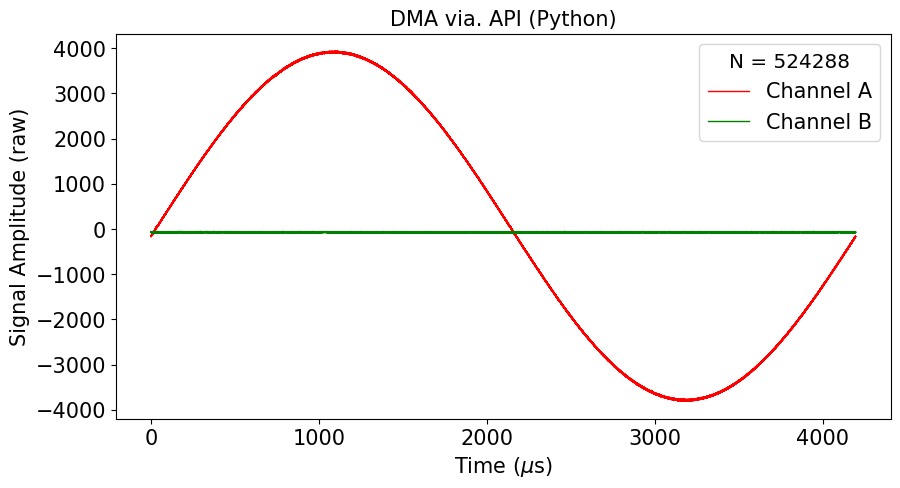

In [23]:
t = np.linspace(0, tSamples, nSamples)

plt.figure(figsize=(10, 5))

plt.plot(t, signal_num_a, 'r-', lw=1, label='Channel A')
plt.plot(t, signal_num_b, 'g-', lw=1, label='Channel B')

plt.title('DMA via. API (Python)', fontsize=15)
plt.xlabel(r'Time ($\mu$s)', fontsize=15)
plt.ylabel(f'Signal Amplitude ({units.lower()})', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

legendTitle = 'N = {}'.format(nSamples)
plt.legend(title=legendTitle, loc='best', title_fontsize='x-large', prop={'size': 15})

plt.show()